In [48]:
# Algerian Forest Fires Datasets

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
dataset=pd.read_csv("algerianforestfiredataset.csv.csv",header=1)
dataset.head()


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [51]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


## Data cleaning process

In [52]:
## checking the null values
dataset[dataset.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


The dataset is converted into two sets based on Region from 122th index, we can make a new column based on the Region

1 : "Bejaia Region Dataset"

2 : "Sidi-Bel Abbes Region Dataset"

Add new column with region


In [53]:
dataset.loc[:122,"Region"]=0
dataset.loc[122:,"Region"]=1
df=dataset

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [55]:
df[['Region']]=df[['Region']].astype(int)

In [56]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [57]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,1


In [58]:
## Removing the null values
df=df.dropna().reset_index()
df.head(2)

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0


In [59]:
df[df.isnull().any(axis=1)]

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


In [60]:
df.iloc[[122]]

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [61]:
## remove the 122nd row
df=df.drop(122).reset_index(drop=True)

In [62]:
df.columns

Index(['index', 'day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [63]:
## fix spaces in columns names
df.columns=df.columns.str.strip()
df.columns

Index(['index', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

## changes the required columns as interger data type

In [64]:
df[['month','day','year','Temperature','RH','Ws']]=df[['month','day','year','Temperature','RH','Ws']].astype(int)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        243 non-null    int64 
 1   day          243 non-null    int32 
 2   month        243 non-null    int32 
 3   year         243 non-null    int32 
 4   Temperature  243 non-null    int32 
 5   RH           243 non-null    int32 
 6   Ws           243 non-null    int32 
 7   Rain         243 non-null    object
 8   FFMC         243 non-null    object
 9   DMC          243 non-null    object
 10  DC           243 non-null    object
 11  ISI          243 non-null    object
 12  BUI          243 non-null    object
 13  FWI          243 non-null    object
 14  Classes      243 non-null    object
 15  Region       243 non-null    int32 
dtypes: int32(7), int64(1), object(8)
memory usage: 23.9+ KB


### changing the other columns to float data type


In [66]:
objects=[features for features in df.columns if df[features].dtype=='O']

In [67]:
for i in objects:
    if i!='Classes':
        df[i]=df[i].astype(float)

In [68]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        243 non-null    int64  
 1   day          243 non-null    int32  
 2   month        243 non-null    int32  
 3   year         243 non-null    int32  
 4   Temperature  243 non-null    int32  
 5   RH           243 non-null    int32  
 6   Ws           243 non-null    int32  
 7   Rain         243 non-null    float64
 8   FFMC         243 non-null    float64
 9   DMC          243 non-null    float64
 10  DC           243 non-null    float64
 11  ISI          243 non-null    float64
 12  BUI          243 non-null    float64
 13  FWI          243 non-null    float64
 14  Classes      243 non-null    object 
 15  Region       243 non-null    int32  
dtypes: float64(7), int32(7), int64(1), object(1)
memory usage: 23.9+ KB


In [69]:
df.head()
df=df.drop(['index'],axis=1)

In [70]:
# Let save the cleaned dataset
df.to_csv("Update_algerianforestfiredataset.csv",index=False)

In [71]:
df_copy=df
df_copy.head(1)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0


## Exploratory data analysis

In [72]:
## drop not required column
df_copy=df_copy.drop(['day','month','year'],axis=1)

In [73]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int32  
 1   RH           243 non-null    int32  
 2   Ws           243 non-null    int32  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    object 
 11  Region       243 non-null    int32  
dtypes: float64(7), int32(4), object(1)
memory usage: 19.1+ KB


In [74]:
df_copy.tail(2)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1


In [75]:
#Encoding classes feature
# first check catageroies on that class
df_copy['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [76]:
df_copy['Classes']=np.where(df_copy['Classes'].str.contains('not fire'),0,1)

In [77]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int32  
 1   RH           243 non-null    int32  
 2   Ws           243 non-null    int32  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    int32  
 11  Region       243 non-null    int32  
dtypes: float64(7), int32(5)
memory usage: 18.2 KB


In [78]:
df_copy.head(2)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0


In [79]:
df_copy['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

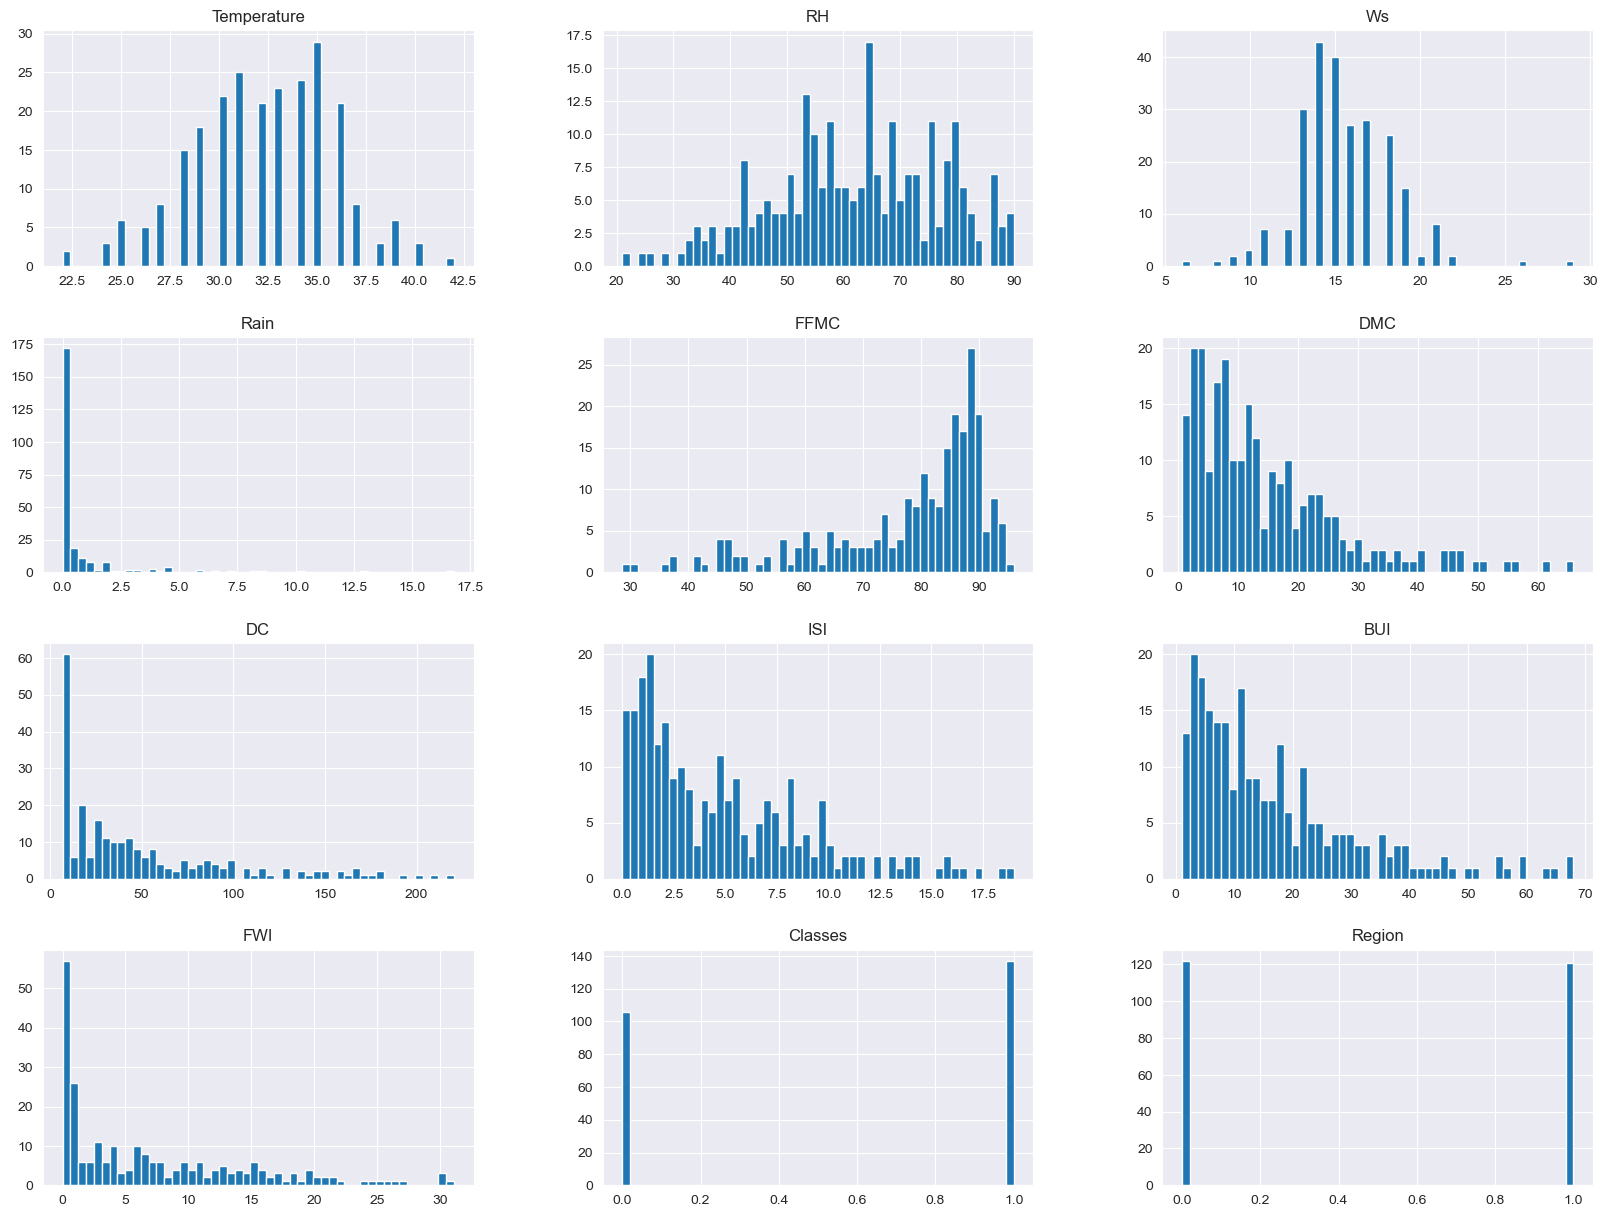

In [80]:
# plot density plot with respect to different numerical features
sns.set_style('darkgrid')
df_copy.hist(bins=50,figsize=(20,15))
plt.show()

In [81]:
# pie chart for percentage

In [82]:
percentage=df_copy['Classes'].value_counts(normalize=True)*100

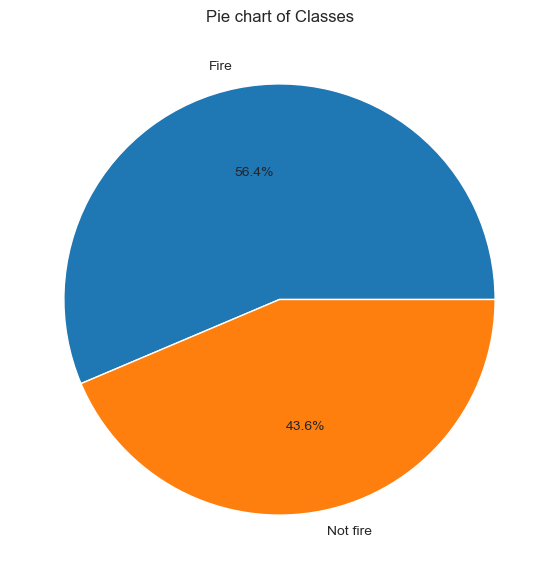

In [83]:
## plotting piechart
classlabels=['Fire','Not fire']
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classlabels,autopct='%1.1f%%')
plt.title('Pie chart of Classes')

plt.show()

In [84]:
## correlation

In [85]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


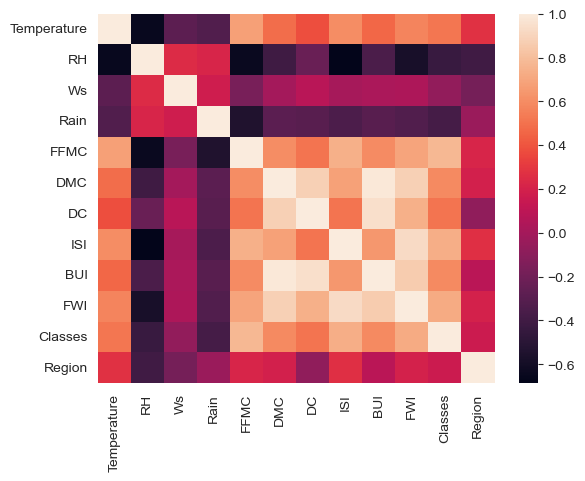

In [91]:
sns.heatmap(df_copy.corr())

plt.show()

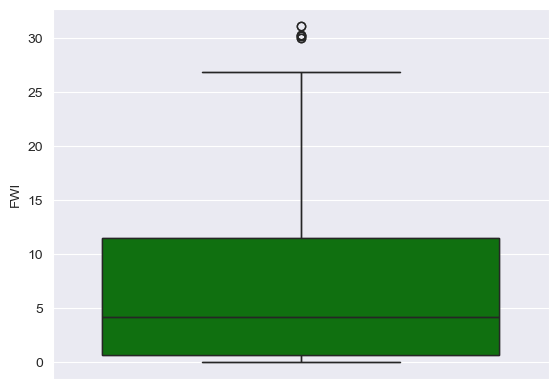

In [93]:
## Box Plots
sns.boxplot(df['FWI'],color='green')
plt.show()

In [105]:
df['month'].unique()

array([6, 7, 8, 9])

In [94]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),'not fire','fire')

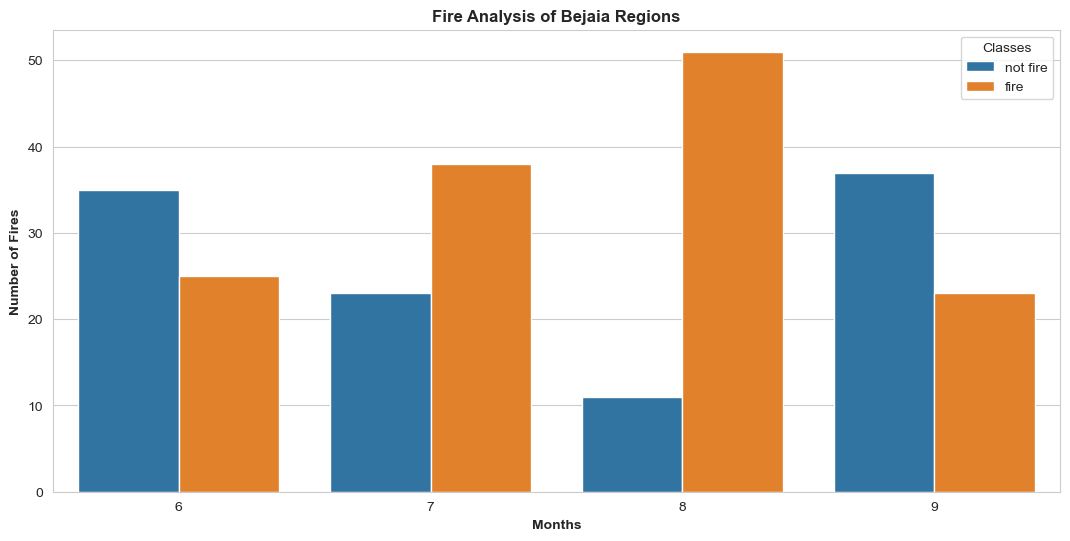

In [113]:
## Monthly Fire Analysis
dftemp=df.loc[df['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title('Fire Analysis of Bejaia Regions',weight='bold')

plt.show()

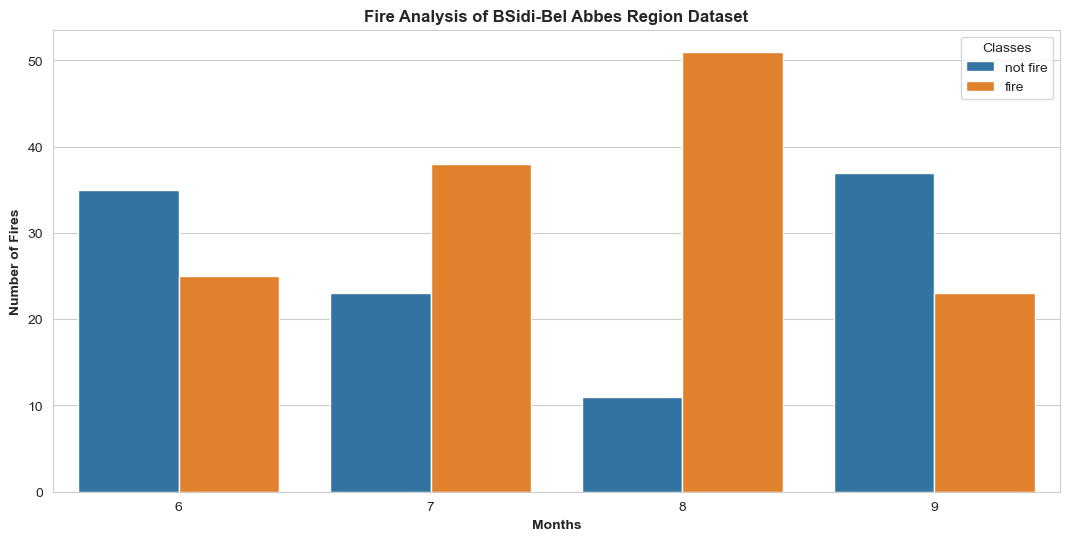

In [114]:
dftemp=df.loc[df['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('%whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title('Fire Analysis of BSidi-Bel Abbes Region Dataset',weight='bold')

plt.show()

its observed that august and september had the most number of forest fires for both regions. And from the above plot of months,we can understand few things

Most of the fires happend in august and very high fires happened in only 3 monts-June,July and August

Less fires was on september